In [1]:
#Importing the necessary libraries
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\komal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Steps and tasks

## Importing and analysing the data

* I am importing the blog data and considering the sample for less run time

In [361]:
#Importing the data
blog_data_main = pd.read_csv("D:/01_Systematic_Folders/01_AIML_course/01_Final_projects/01_NLP/Project/Project1/blogtext.csv")

In [362]:
blog_data=blog_data_main.iloc[0:5000]

In [363]:
blog_data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [364]:
blog_data.count()

id        5000
gender    5000
age       5000
topic     5000
sign      5000
date      5000
text      5000
dtype: int64

In [365]:
blog_data.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

## Exploratory data analysis

<AxesSubplot:>

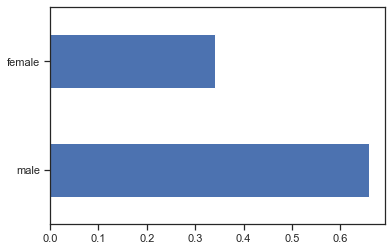

In [366]:
blog_data['gender'].value_counts(normalize=True).plot(kind = 'barh')

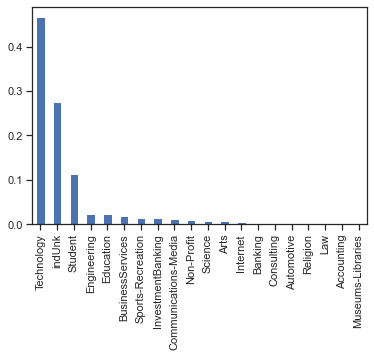

In [367]:
p=blog_data['topic'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

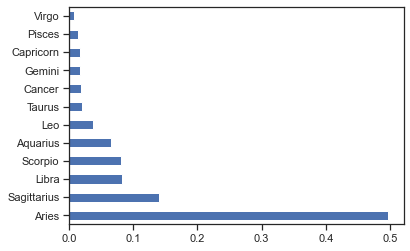

In [368]:
blog_data['sign'].value_counts(normalize=True).plot(kind = 'barh')

<AxesSubplot:>

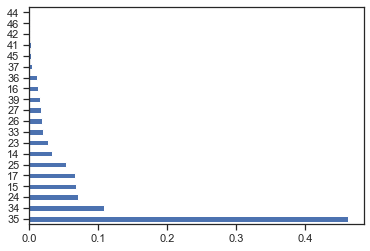

In [369]:
blog_data['age'].value_counts(normalize=True).plot(kind = 'barh')

### Performing the binning on age variable on the basis of percentage distribution

In [370]:
bins = [0,10,11,20,21,30,31,40,50]
blog_data['binned_age_range'] = pd.cut(blog_data['age'], bins)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [371]:
blog_data['binned_age_range'] = blog_data['binned_age_range'].astype("str")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [372]:
blog_data

,id,gender,age,topic,sign,date,text,binned_age_range
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...","(11, 20]"
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,"(11, 20]"
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,"(11, 20]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,"(11, 20]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"(31, 40]"
...,...,...,...,...,...,...,...,...
4995,1103575,female,17,indUnk,Scorpio,"27,August,2003",So... I had another one of those dreams...,"(11, 20]"
4996,1103575,female,17,indUnk,Scorpio,"27,August,2003",mmm... strawberry tea for breakfast. To...,"(11, 20]"
4997,1103575,female,17,indUnk,Scorpio,"27,August,2003","Yay for a new layout!! Yeah, I know, I...","(11, 20]"
4998,1103575,female,17,indUnk,Scorpio,"26,August,2003","Ok, so I lied... Fed up isn't playing F...","(11, 20]"


In [373]:
blog_data['binned_age_range']=blog_data['binned_age_range'].str.replace("(","BtW ") 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [374]:
blog_data['binned_age_range']=blog_data['binned_age_range'].str.replace("]","") 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [375]:
blog_data['binned_age']=blog_data['binned_age_range'].str.replace(","," AND ") 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [376]:
blog_data.head()

,id,gender,age,topic,sign,date,text,binned_age_range,binned_age
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...","BtW 11, 20",BtW 11 AND 20
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,"BtW 11, 20",BtW 11 AND 20
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,"BtW 11, 20",BtW 11 AND 20
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,"BtW 11, 20",BtW 11 AND 20
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"BtW 31, 40",BtW 31 AND 40


### Combining the sun sign on the basis of qualities - into four groups : Fire, Earth , Water and Air signs

In [377]:
# Fire Signs: Aries, Leo, Sagittarius                   
# Earth Signs: Taurus, Virgo, Capricorn
# Air Signs: Gemini, Libra, Aquarius
# Water Signs: Cancer, Scorpio, Pisces

In [378]:
def label_sun_sign (sun_sign):
    if sun_sign['sign'] in ['Aries', 'Leo', 'Sagittarius']:
        return 'Fire_Signs'
    if sun_sign['sign'] in ['Taurus', 'Virgo', 'Capricorn']:
        return 'Earth_Signs'
    if sun_sign['sign'] in ['Gemini', 'Libra', 'Aquarius']:
        return 'Air_Signs'
    if sun_sign['sign'] in ['Cancer', 'Scorpio', 'Pisces']:
        return 'Water_Signs'
    return 'etc'

In [379]:
blog_data['sun_sign'] = blog_data.apply(lambda sun_sign: label_sun_sign(sun_sign), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [380]:
blog_data.head()

,id,gender,age,topic,sign,date,text,binned_age_range,binned_age,sun_sign
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...","BtW 11, 20",BtW 11 AND 20,Fire_Signs
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,"BtW 11, 20",BtW 11 AND 20,Fire_Signs
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,"BtW 11, 20",BtW 11 AND 20,Fire_Signs
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,"BtW 11, 20",BtW 11 AND 20,Fire_Signs
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,"BtW 31, 40",BtW 31 AND 40,Air_Signs


## Distribution of the attributes across bloggers

<Figure size 720x360 with 0 Axes>

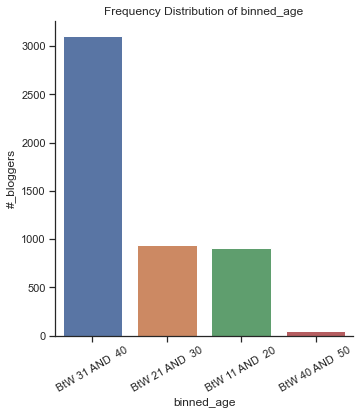

<Figure size 720x360 with 0 Axes>

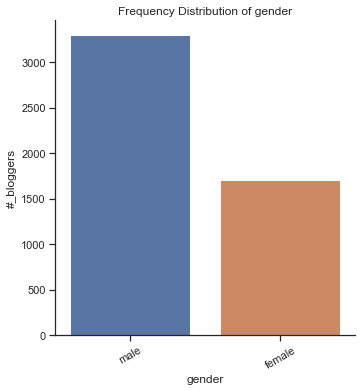

<Figure size 720x360 with 0 Axes>

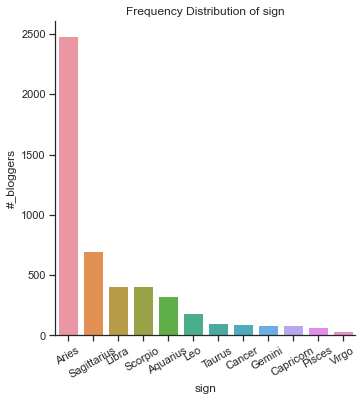

<Figure size 720x360 with 0 Axes>

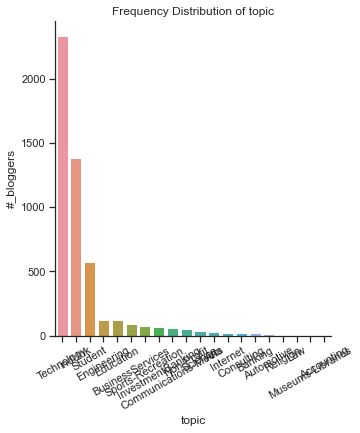

In [381]:
var_list=['binned_age','gender','sign','topic']

for var in var_list:
    df_1=pd.DataFrame(blog_data.groupby(var).size()).rename(columns={0:"#_bloggers"}).reset_index()
    df_2=df_1.sort_values(by='#_bloggers', ascending=False)
    plt.figure(figsize=(10,5))
    g=sns.catplot(x=var, y='#_bloggers', kind="bar",data=df_2)
    plt.title('Frequency Distribution of '+var)
    g.set_xticklabels(rotation=30)
    plt.show()

* Bloggers betweern 31-40 are more ; males are more ; aries as sun_sign are more ; technology as a subject is more

## Performing data pre-processing

### Data cleaning by removing unwanted character ,stop words etc, convert to lower case

In [383]:
def cleaning_text_column(pre_text):
#     Removing HTML tags
    after_html_text = BeautifulSoup(pre_text, 'lxml').get_text() 
    
#  Remove non-alphabetic charecters 
    letters_only = re.sub("[^a-zA-Z]", " ", after_html_text) 
    
#  Convert to lower case 
    words = letters_only.lower().split()                           
    
#  creating stop words
    stops = set(stopwords.words("english"))                  

#  Removing stop words
    after_stop_words = [w for w in words if not w in stops]   
    
# Join the words separated by space 
    return( " ".join( after_stop_words ))

In [384]:
blog_data['cleaned_text']=blog_data.text.apply(cleaning_text_column)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [386]:
blog_data['cleaned_text_ len']=blog_data.cleaned_text.apply(len)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Creating the label merger

In [388]:
blog_data['label']=' '
for values in range(0,blog_data.shape[0]):
    blog_label=[]
    blog_label.append(blog_data['gender'][values])
    blog_label.append(blog_data['binned_age'][values])
    blog_label.append(blog_data['topic'][values])
    blog_label.append(blog_data['sun_sign'][values])
    blog_data['label'][values]=blog_label

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3427: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [390]:
## dropping all columns and retaining only cleaned_text and labels column
blog_df=blog_data.drop(['id','gender','age','topic','sign','date','text'],axis=1)

In [391]:
X = blog_df.cleaned_text
y = blog_df.label

In [392]:
X

0       info found pages mb pdf files wait untill team...
1       team members drewes van der laag urllink mail ...
2       het kader van kernfusie op aarde maak je eigen...
3                                         testing testing
4       thanks yahoo toolbar capture urls popups means...
                              ...                        
4995    another one dreams last night except time leas...
4996    mmm strawberry tea breakfast tomorrow think de...
4997    yay new layout yeah know need get complicated ...
4998    ok lied fed playing friday night underdog cons...
4999    well today went church talked music director t...
Name: cleaned_text, Length: 5000, dtype: object

In [393]:
y

0             [male, BtW 11 AND  20, Student, Fire_Signs]
1             [male, BtW 11 AND  20, Student, Fire_Signs]
2             [male, BtW 11 AND  20, Student, Fire_Signs]
3             [male, BtW 11 AND  20, Student, Fire_Signs]
4       [male, BtW 31 AND  40, InvestmentBanking, Air_...
                              ...                        
4995        [female, BtW 11 AND  20, indUnk, Water_Signs]
4996        [female, BtW 11 AND  20, indUnk, Water_Signs]
4997        [female, BtW 11 AND  20, indUnk, Water_Signs]
4998        [female, BtW 11 AND  20, indUnk, Water_Signs]
4999        [female, BtW 11 AND  20, indUnk, Water_Signs]
Name: label, Length: 5000, dtype: object

In [394]:
# split dataset into training and test set 

X_train, X_test, y_train, y_test = train_test_split(blog_df['cleaned_text'], y, test_size=0.3, random_state=7)


In [395]:
from sklearn.preprocessing import MultiLabelBinarizer

## Transform the labels

In [396]:
multilabel_binarizer = MultiLabelBinarizer()
y_train_mlb=multilabel_binarizer.fit_transform(y_train)
y_test_mlb=multilabel_binarizer.transform(y_test)

In [397]:
y_train_mlb

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [398]:
print(X_train.shape)
print(X_test.shape)
print(y_train_mlb.shape)
print(y_test_mlb.shape)

(3500,)
(1500,)
(3500, 30)
(1500, 30)


In [399]:
y_train_mlb[0]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1])

In [400]:
type(X_train)

pandas.core.series.Series

In [401]:
y_train.iloc[1]

['male', 'BtW 31 AND  40', 'Technology', 'Fire_Signs']

In [402]:
multilabel_binarizer.inverse_transform(y_train_mlb)[1]

('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male')

In [403]:
# instantiate the vectorizer
# creating bag of words which include 1-grams and 2-gram
vect = CountVectorizer(ngram_range=(1, 2))

In [404]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)


In [405]:
# examine & print the document-term matrix
X_train_dtm

<3500x242035 sparse matrix of type '<class 'numpy.int64'>'
	with 459803 stored elements in Compressed Sparse Row format>

In [407]:
X_test_dtm = vect.transform(X_test)

In [409]:
vect.get_feature_names()[:10]

['aa',
 'aa amazing',
 'aa compared',
 'aaa',
 'aaa come',
 'aaa someone',
 'aaa tow',
 'aaa travel',
 'aaaaaaaaah',
 'aaaaaaah']

In [410]:
# Creating a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. 

In [411]:
label_counts=dict()

for labels in blog_df.label.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [412]:
label_counts

{'male': 3294,
 'BtW 11 AND  20': 907,
 'Student': 569,
 'Fire_Signs': 3377,
 'BtW 31 AND  40': 3106,
 'InvestmentBanking': 70,
 'Air_Signs': 829,
 'female': 1706,
 'indUnk': 1381,
 'BtW 21 AND  30': 940,
 'Earth_Signs': 225,
 'Non-Profit': 47,
 'Water_Signs': 569,
 'Banking': 16,
 'Education': 118,
 'BtW 40 AND  50': 47,
 'Engineering': 119,
 'Science': 33,
 'Communications-Media': 61,
 'BusinessServices': 87,
 'Sports-Recreation': 75,
 'Arts': 31,
 'Internet': 20,
 'Museums-Libraries': 2,
 'Accounting': 2,
 'Technology': 2332,
 'Law': 3,
 'Consulting': 16,
 'Automotive': 14,
 'Religion': 4}

### Choosing a classifier

In [413]:
# Using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class.  As a basic classifier using LogisticRegression . 

In [415]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [414]:
# Fit the classifier, make predictions and get the accuracy

In [416]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_dtm,y_train_mlb)

OneVsRestClassifier(estimator=LogisticRegression())

In [417]:
Ypred=model.predict(X_test_dtm)

In [418]:
Ypred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [419]:
y_test_mlb

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [421]:
# Micro-average method,
# sum the individual true positives, false positives, and false negatives of the system for different sets 

def score_micro_method(y_test_mlb, Ypred):
    print('******************************************************************************')
    print('Scores based on micro method')
    print('Accuracy score: ', accuracy_score(y_test_mlb, Ypred))
    print('F1 score', f1_score(y_test_mlb, Ypred, average='micro'))
    print('Average precision score', average_precision_score(y_test_mlb, Ypred, average='micro'))
    print('Average recall score', recall_score(y_test_mlb, Ypred, average='micro'))
    print('******************************************************************************')
    

# Macro-average Method
# Average of the precision and recall of the system on different sets   
def score_macro_method(y_test_mlb, Ypred):
    print('******************************************************************************')
    print('Scores based on macro method')
    print('Accuracy score: ', accuracy_score(y_test_mlb, Ypred))
    print('F1 score: ', f1_score(y_test_mlb, Ypred, average='macro'))
    print('Average recall score : ', recall_score(y_test_mlb, Ypred, average='macro'))
    print('******************************************************************************')
    
def score_weighted_method(y_test_mlb, Ypred):
    print('******************************************************************************')
    print('Scores based on weighted method')
    print('Accuracy score: ', accuracy_score(y_test_mlb, Ypred))
    print('F1 score: ', f1_score(y_test_mlb, Ypred, average='weighted'))
    print('Average precision score: ', average_precision_score(y_test_mlb, Ypred, average='weighted'))
    print('Average recall score: ', recall_score(y_test_mlb, Ypred, average='weighted'))
    print('******************************************************************************')

In [422]:
score_micro_method(y_test_mlb,Ypred)
score_macro_method(y_test_mlb,Ypred)
score_weighted_method(y_test_mlb,Ypred)

******************************************************************************
Scores based on micro method
Accuracy score:  0.5333333333333333
F1 score 0.7665812947098826
Average precision score 0.6266440394931847
Average recall score 0.7233333333333334
******************************************************************************
******************************************************************************
Scores based on macro method
Accuracy score:  0.5333333333333333
F1 score:  0.33274389164751766
Average recall score :  0.28368566264255674
******************************************************************************
******************************************************************************
Scores based on weighted method
Accuracy score:  0.5333333333333333
F1 score:  0.7351403827185807
Average precision score:  0.6602284527089454
Average recall score:  0.7233333333333334
******************************************************************************


### Testing the best text classifier.

In [429]:

def Train_diff_model(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    return model

In [430]:
models = ['lr','svm','nbayes']
for model in models:
    print('-----------------------------------------------------------------------------')
    print("Model name : ",model)
    model = Train_diff_model(X_train_dtm,y_train_mlb,model=model)
    model.fit(X_train_dtm,y_train_mlb)
    Ypred=model.predict(X_test_dtm)
    print('-----------------------------------------------------------------------------')
   
    print(f"**Score metrics of the model :  {model}\n")
    
    print('******************************************************************************')
    score_micro_method(y_test_mlb,Ypred)

   
    print('******************************************************************************')
    score_macro_method(y_test_mlb,Ypred)
   

    print('******************************************************************************')
    score_weighted_method(y_test_mlb,Ypred)

    

-----------------------------------------------------------------------------
Model name :  lr
-----------------------------------------------------------------------------
**Score metrics of the model :  OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

******************************************************************************
******************************************************************************
Scores based on micro method
Accuracy score:  0.5166666666666667
F1 score 0.7729200934983983
Average precision score 0.632442827118237
Average recall score 0.744
******************************************************************************
******************************************************************************
******************************************************************************
Scores based on macro method
Accuracy score:  0.5166666666666667
F1 score:  0.4254438040002453
Average r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-----------------------------------------------------------------------------
**Score metrics of the model :  OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

******************************************************************************
******************************************************************************
Scores based on micro method
Accuracy score:  0.5
F1 score 0.7718667009337787
Average precision score 0.6294683295140725
Average recall score 0.7508333333333334
******************************************************************************
******************************************************************************
******************************************************************************
Scores based on macro method
Accuracy score:  0.5
F1 score:  0.459244279927318
Average recall score :  0.41674173200340636
******************************************************************************
****************************************************************

In [ ]:
## True vs predicted labels for any 5 entries from the dataset

In [424]:
preds = Ypred[:5]
actuals = y_test_mlb[:5]

In [425]:
Actual = multilabel_binarizer.inverse_transform(actuals)
Actual

[('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male'),
 ('BtW 21 AND  30', 'BusinessServices', 'Water_Signs', 'male'),
 ('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male'),
 ('BtW 31 AND  40', 'Fire_Signs', 'female', 'indUnk'),
 ('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male')]

In [426]:
pred = multilabel_binarizer.inverse_transform(preds)
pred

[('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male'),
 ('BtW 21 AND  30', 'BusinessServices', 'Water_Signs', 'male'),
 ('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male'),
 ('BtW 31 AND  40', 'Fire_Signs', 'female', 'indUnk'),
 ('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male')]

In [427]:
import random
random_num=[]
for i in range(5):
    random_num.append(random.randint(1,len(Ypred)))
   
print(random_num)

for i in random_num:  
    print(multilabel_binarizer.inverse_transform(y_test_mlb)[i])
    print(multilabel_binarizer.inverse_transform(Ypred)[i])
    

[211, 467, 1296, 819, 1290]
('BtW 11 AND  20', 'Water_Signs', 'indUnk', 'male')
('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male')
('BtW 21 AND  30', 'Water_Signs', 'female', 'indUnk')
('Air_Signs', 'BtW 31 AND  40', 'female')
('BtW 11 AND  20', 'Water_Signs', 'female', 'indUnk')
('Air_Signs', 'BtW 11 AND  20', 'BtW 21 AND  30', 'female')
('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male')
('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male')
('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male')
('BtW 31 AND  40', 'Fire_Signs', 'Technology', 'male')


In [428]:
Ypred_inversed = multilabel_binarizer.inverse_transform(Ypred)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test_mlb)
for i in range(5):
    print('True labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

True labels:	BtW 31 AND  40,Fire_Signs,Technology,male
Predicted labels:	BtW 31 AND  40,Fire_Signs,Technology,male


True labels:	BtW 21 AND  30,BusinessServices,Water_Signs,male
Predicted labels:	BtW 21 AND  30,BusinessServices,Water_Signs,male


True labels:	BtW 31 AND  40,Fire_Signs,Technology,male
Predicted labels:	BtW 31 AND  40,Fire_Signs,Technology,male


True labels:	BtW 31 AND  40,Fire_Signs,female,indUnk
Predicted labels:	BtW 31 AND  40,Fire_Signs,female,indUnk


True labels:	BtW 31 AND  40,Fire_Signs,Technology,male
Predicted labels:	BtW 31 AND  40,Fire_Signs,Technology,male




* F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall 
* Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs.
* A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally)
* whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance 

* If we compare F1 score of all the models Logistic, SVM,nbayes then logisticis performing best with F1 score 0.772

# Part 2

In [ ]:
#Necessary libraries for part 2

In [14]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\komal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\komal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!','=','~']
data_file = open('D:/01_Systematic_Folders/01_AIML_course/01_Final_projects/01_NLP/Project/Project1/GL Bot.json').read()
cust_intent = json.loads(data_file)

In [16]:
cust_intent

{'intents': [{'tag': 'Intro',
   'patterns': ['hi',
    'how are you',
    'is anyone there',
    'hello',
    'whats up',
    'hey',
    'yo',
    'listen',
    'please help me',
    'i am learner from',
    'i belong to',
    'aiml batch',
    'aifl batch',
    'i am from',
    'my pm is',
    'blended',
    'online',
    'i am from',
    'hey ya',
    'talking to you for first time'],
   'responses': ['Hello! how can i help you ?'],
   'context_set': ''},
  {'tag': 'Exit',
   'patterns': ['thank you',
    'thanks',
    'cya',
    'see you',
    'later',
    'see you later',
    'goodbye',
    'i am leaving',
    'have a Good day',
    'you helped me',
    'thanks a lot',
    'thanks a ton',
    'you are the best',
    'great help',
    'too good',
    'you are a good learning buddy'],
   'responses': ['I hope I was able to assist you, Good Bye'],
   'context_set': ''},
  {'tag': 'Olympus',
   'patterns': ['olympus',
    'explain me how olympus works',
    'I am not able to understan

In [17]:
for intent in cust_intent['intents']:
    for pattern in intent['patterns']:

        # take each word and tokenize it
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        # adding documents
        documents.append((w, intent['tag']))

        # adding classes to our class list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [18]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print (len(documents), "documents")

print (len(classes), "classes", classes)

print (len(words), "unique lemmatized words", words)


pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

128 documents
8 classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
158 unique lemmatized words ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimi

In [19]:
# Building the Deep Learning Model

In [20]:
# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:
    # initializing bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [21]:
# Create model - 3 layers
model = Sequential()
# First layer 128 neurons
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
# second layer 64 neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# 3rd output layer contains number of neurons
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

Epoch 1/200
26/26 [==============================] - 0s 1ms/step - loss: 2.1355 - accuracy: 0.1480
Epoch 2/200
26/26 [==============================] - 0s 1ms/step - loss: 1.9351 - accuracy: 0.2512
Epoch 3/200
26/26 [==============================] - 0s 484us/step - loss: 1.8046 - accuracy: 0.3577
Epoch 4/200
26/26 [==============================] - 0s 644us/step - loss: 1.7533 - accuracy: 0.3512
Epoch 5/200
26/26 [==============================] - 0s 2ms/step - loss: 1.6580 - accuracy: 0.3948
Epoch 6/200
26/26 [==============================] - 0s 1ms/step - loss: 1.6159 - accuracy: 0.4333
Epoch 7/200
26/26 [==============================] - 0s 995us/step - loss: 1.4913 - accuracy: 0.4239
Epoch 8/200
26/26 [==============================] - 0s 1ms/step - loss: 1.3721 - accuracy: 0.5495
Epoch 9/200
26/26 [==============================] - 0s 1ms/step - loss: 1.1688 - accuracy: 0.6467
Epoch 10/200
26/26 [==============================] - 0s 1ms/step - loss: 1.1033 - accuracy: 0.6900
Epo

In [25]:
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('D:/01_Systematic_Folders/01_AIML_course/01_Final_projects/01_NLP/Project/Project1/GL Bot.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [26]:
def sentence_cleaning(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag 
def bow_clean(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = sentence_cleaning(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("bag words: %s" % w)
    return(np.array(bag))

def predicting_class(sentence, model):
    # filter out predictions below a threshold
    p = bow_clean(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getting_Response(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(msg):
    ints = predicting_class(msg, model)
    res = getting_Response(ints, intents)
    return res

In [69]:
#Creating GUI with tkinter
import tkinter
from tkinter import *


def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)

    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "User: " + msg + '\n\n')
        ChatLog.config()

        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')

        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)


base = Tk()
base.title("Hi This is Customer support to help you faster")
base.geometry("400x500")


#Create Chat window
ChatLog = Text(base, bd=0, bg="grey", height="10", width="50" )

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview)
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
Send_Button = Button(base,  text="Send request", width="12", height=3,command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="yellow",width="29", height="5")

#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=405, height=90, width=265)
Send_Button.place(x=6, y=405, height=90)

base.mainloop()

In [70]:
message='I am not getting good solution for my problem?'

print("User:",message)

print("Bot:",chatbot_response(message))

User: I am not getting good solution for my problem?
Bot: Tarnsferring the request to your PM


In [71]:
message='I am not able to understand the details on olympus?'

print("User:",message)

print("Bot:",chatbot_response(message))

User: I am not able to understand the details on olympus?
Bot: Link: Olympus wiki
